In [1]:
%load_ext autoreload
%autoreload 2
# %matplotlib widget
%pdb off

from pyCascade import probePost, physics, utils
from pyCascade.probeReadWrite import read_probes_file_switch
from matplotlib import pyplot as plt
import numpy as np
import os
from IPython.core.debugger import set_trace
import pandas as pd

category =  "config2"

############ Universal ################
scratch_home = os.getenv('SCRATCH') #need to set SCRATCH (even if there is no real SCRATCH) to the location where results are written
scratch_dir = f'{scratch_home}/Cascade/city_block_cfd'
home_dir = !pwd
home_dir = home_dir[0]

display(scratch_dir)
display(home_dir)

Automatic pdb calling has been turned OFF


'/scratch/users/nbachand/Cascade/city_block_cfd'

'/oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd'

u_bulk is 2.6803574256411156
domain height is 116.0
u_bulk is 2.6836620775473787
domain height is 116.0


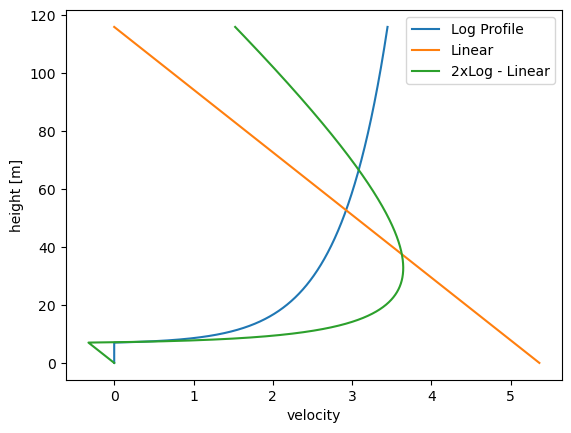

In [2]:
vK_const = .41
hm = 6
rho = 1.225
mu = 1.7894e-5
# Re_tau = 43300
# Lz =  24*hm*4/3/3
Lx = 348
Lz = Lx / 3
z_ref = 10 # really y_refj
U_ref = 2

z_0 = 0.061*hm #used for convention, but really y_0
disp = 1.11*hm
shear_vel = vK_const*U_ref/np.log(z_ref/z_0)

plt.figure()
LES_params = {
    'uStar': shear_vel,
    'z0': z_0,
    'disp': disp,
    'Dt': .01,
    'z_values' : np.linspace(0,Lz,10000)
}
physics_setup = physics.LES_Physics(LES_params)
physics_setup.plot_log_wind()

physics_setup.plot_spinup_velocity()
physics_setup.plot_spinup_velocity2()

plt.legend()

plt.show()

In [3]:
display(
    physics_setup.LES_params['uStar'], 
    physics_setup.LES_params['z0'], 
    physics_setup.LES_params['disp'], 
    physics_setup.LES_params['u_bulk'],
    physics_setup.LES_params['log_wind'][-1]
    )

0.24790587268977465

0.366

6.66

2.6836620775473787

3.4462448896341136

In [4]:
physics_setup.calc_flatplate_quantities(
    rho = 1.224,
    mu = 1.7894e-5,
    yPlus = 500
    )

U infinity is 3.4462448896341136 with L = 116.0
flat plate Reynolds number is 27345011.423371524
wall spacing is 0.06320970849578368 for y+ of 500


In [5]:
window_dim = hm/2/4

velocity_scaling = 1
ventilation_scaling = velocity_scaling/(window_dim**2)


In [6]:
# start = -25000#-250000
# stop = -1000
by = 1
start = -10
stop = -1

# Run Specifics

In [7]:
run = 33
qois = ["comp(u_avg,0)", "comp(u_avg,1)", "comp(u_avg,2)"]

probes_dir = f'{scratch_dir}/CHARLES/{category}/R{run}/probes/probesOut'
oak_probes_dir =  f'{home_dir}/CHARLES/{category}/R{run}/probes/probesOut_parquet/'


In [8]:
# probes = probePost.Probes(probes_dir, directory_parquet=oak_probes_dir, file_type = "csv")
# probes.to_parquet(overwrite=True)

probes = probePost.Probes(probes_dir, directory_parquet = oak_probes_dir, file_type = "parquet")

In [9]:
nameKey = read_probes_file_switch(f"{probes_dir}/../locations/nameKey_extraProbe.txt")
nameKey = nameKey.compute()
nameKey

,0
0,extraProbe_roof_sl
1,extraProbe_xwindow_0-0_sl
2,extraProbe_zwindow_0-0_sl
3,extraProbe_xwindow_0-1_sl
4,extraProbe_zwindow_0-1_sl
...,...
211,extraProbe_zwindow_0-1_h_0-2_Bxz
212,extraProbe_zwindow_1-0_h_0-2_Bxz
213,extraProbe_zwindow_1-1_h_0-2_Bxz
214,extraProbe_zwindow_2-0_h_0-2_Bxz


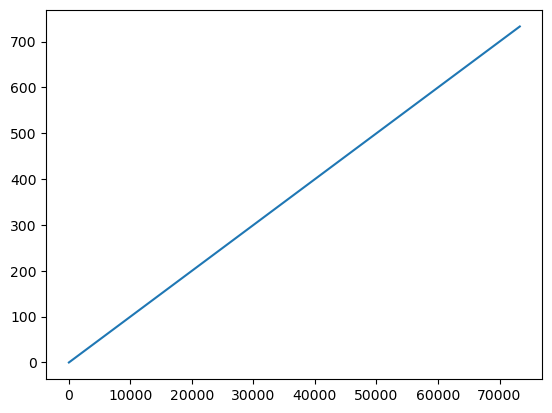

In [10]:
plt.figure()
plt.plot(probes.probe_steps, probes.probe_times)
plt.show()

In [11]:
extraProbe = nameKey.copy()
extraProbe = pd.concat([extraProbe, probes.locations["extraProbe"]], axis = "columns")
for qoi in qois:
    df = probePost.ddf_to_pdf(probes.data[("extraProbe", qoi)]).iloc[-1]
    df.name = qoi
    extraProbe = pd.concat([extraProbe, df], axis = "columns")
extraProbe

,0,x,y,z,"comp(u_avg,0)","comp(u_avg,1)","comp(u_avg,2)"
0.0,extraProbe_roof_sl,44.00,6.0,60.00,1.756093,1.205218,2.810052
1.0,extraProbe_xwindow_0-0_sl,39.55,1.5,58.00,-0.146307,-0.287386,-0.077321
2.0,extraProbe_zwindow_0-0_sl,40.00,1.5,57.55,-0.032142,-0.186018,-0.067203
3.0,extraProbe_xwindow_0-1_sl,39.55,1.5,62.00,-0.241927,0.007345,0.150071
4.0,extraProbe_zwindow_0-1_sl,40.00,1.5,65.45,0.548909,-0.501247,0.144209
...,...,...,...,...,...,...,...
211.0,extraProbe_zwindow_0-1_h_0-2_Bxz,-56.00,1.5,-113.45,1.094752,-0.117937,-0.138079
212.0,extraProbe_zwindow_1-0_h_0-2_Bxz,-60.00,1.5,-105.55,-0.004111,0.008670,0.026522
213.0,extraProbe_zwindow_1-1_h_0-2_Bxz,-60.00,1.5,-113.45,1.324246,-0.229594,0.021360
214.0,extraProbe_zwindow_2-0_h_0-2_Bxz,-64.00,1.5,-105.55,-0.123190,-0.003457,-0.029173
